# Garmin Rowing Report

In [27]:
import tcxtools
from helper import overlay_graph, mean_graph
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# TCX and CSV files name without extension

In [28]:
filename = 'activity_5274851554'

# Reading .TCX file

In [35]:
tcx_data = tcxtools.TCXPandas('./rowing/' + filename + '.tcx')
tracks, laps = tcx_data.parse()
tracks = tracks.set_index('time')

# Reading .CSV file

In [30]:
csv_data = pd.read_csv('./rowing/' + filename + '.csv')
csv = csv_data.head(-1)
csv = csv[~(csv['Calories'] == 0)]

In [43]:
csv

,Laps,Time,Cumulative Time,Distance,Avg Pace,Avg HR,Max HR,Elev Gain,Elev Loss,Avg Stroke Rate,Max Stroke Rate,Avg Distance per Stroke,Calories,Best Pace,Moving Time,Avg Moving Pace
0,1,3:43.0,3:43.0,465,4:00,116,130,--,2,18,25,7.83,24,2:20,3:43,4:00
1,2,2:26.0,6:09.0,335,3:38,124,134,1,--,16,18,9.77,18,2:09,2:26,3:38
2,3,3:38.0,9:47.0,312,5:49,112,126,--,1,25,44,8.26,20,2:16,2:20,3:44
3,4,8:29.0,18:16,984,4:19,114,150,--,--,23,51,7.90,40,2:05,7:19,3:43
4,5,3:02.0,21:18,520,2:55,147,154,--,--,17,23,9.76,29,2:03,3:02,2:55
5,6,1:25.0,22:43,234,3:02,148,154,--,--,17,21,9.11,13,2:16,1:25.0,3:02
6,7,5:12.0,27:55,404,6:26,114,144,--,--,18,20,8.56,22,2:02,3:39,4:31
7,8,2:07.0,30:02,357,2:58,144,150,--,--,17,23,9.54,19,2:01,2:07.0,2:58
8,9,2:27,32:29,404,3:02,147,151,--,--,17,18,9.74,23,2:06,2:27,3:02
9,10,1:57.0,34:26,329,2:58,154,164,--,--,20,24,8.31,19,2:08,1:57,2:58


# Laps

In [36]:
laps = laps[~(laps['calories'] == 0)]
laps['energy (kj)'] = (laps['power (w)'] * laps['time (s)']) / 1000

laps

,time (s),distance (m),max speed (m/s),max speed (km/h),calories,avg hr,max hr,power (w),energy (kj)
0,223,465.45,3.574,12.866,24,116,130,450.296,100.416008
1,146,334.63,3.882,13.975,18,124,134,515.836,75.312056
2,218,312.06,3.667,13.201,20,112,126,383.853,83.679954
3,509,983.81,4.003,14.411,40,114,150,328.802,167.360218
4,182,519.78,4.059,14.612,29,147,154,666.681,121.335942
5,85,234.02,3.676,13.234,13,148,154,639.906,54.392010
6,312,404.32,4.106,14.782,22,114,144,295.026,92.048112
7,127,357.17,4.133,14.879,19,144,150,625.953,79.496031
8,147,403.61,3.984,14.342,23,147,151,654.639,96.231933
9,117,329.27,3.900,14.040,19,154,164,679.453,79.496001


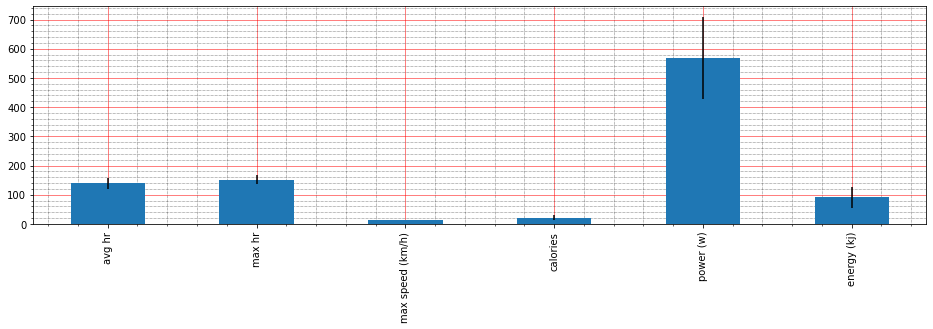

In [6]:
mean_graph(laps[['avg hr', 'max hr', 'max speed (km/h)', 'calories', 'power (w)', 'energy (kj)']])

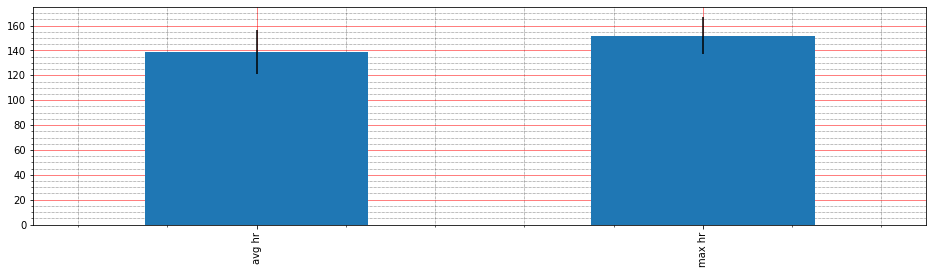

In [37]:
mean_graph(laps[['avg hr', 'max hr']])

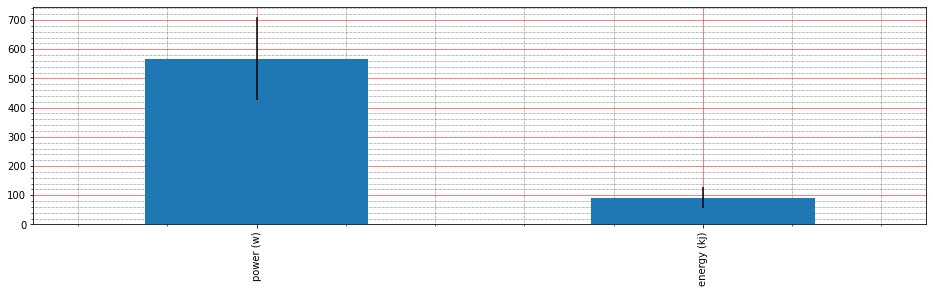

In [39]:
mean_graph(laps[['power (w)', 'energy (kj)']])

# Tracking points

In [7]:
tracks

,latitude,longitude,altitude,distance,hr,speed (m/s),speed (km/h)
time,,,,,,,
2020-07-22 10:17:23+00:00,-15.823883,-47.882752,1002.799988,0.970000,106.0,0.877,3.1572
2020-07-22 10:17:24+00:00,-15.823886,-47.882744,1002.799988,1.840000,104.0,0.718,2.5848
2020-07-22 10:17:25+00:00,-15.823887,-47.882737,1002.599976,2.620000,104.0,0.924,3.3264
2020-07-22 10:17:26+00:00,-15.823889,-47.882728,1002.599976,3.570000,105.0,0.952,3.4272
2020-07-22 10:17:27+00:00,-15.823892,-47.882720,1002.400024,4.490000,106.0,0.886,3.1896
...,...,...,...,...,...,...,...
2020-07-22 11:02:05+00:00,-15.824101,-47.882352,1001.000000,6059.970215,136.0,1.708,6.1488
2020-07-22 11:02:06+00:00,-15.824102,-47.882367,1001.000000,6061.620117,135.0,1.577,5.6772
2020-07-22 11:02:07+00:00,-15.824104,-47.882381,1001.000000,6063.120117,134.0,1.484,5.3424


# Total Distance (meters)

In [8]:
round(tracks['distance'].tail(1).values[0], 3)

6065.82

# Speed (km/h) per Tracking Point

In [9]:
speed = tracks[~(tracks['speed (km/h)'] <= 1.85)]
speed['speed (km/h)'].describe()

count    2406.000000
mean        8.980155
std         2.436678
min         1.882800
25%         7.693200
50%         9.086400
75%        10.580400
max        15.181200
Name: speed (km/h), dtype: float64

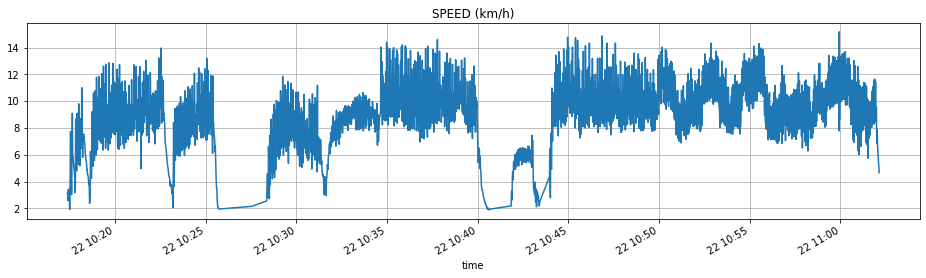

In [40]:
graph = speed['speed (km/h)']
graph.astype(float).plot(figsize=(16,4))
plt.title('SPEED (km/h)')
plt.grid()

# Max Speed (km/h) per Lap

In [41]:
laps['max speed (km/h)'].describe()

count    15.000000
mean     13.951133
std       0.923457
min      11.657000
25%      13.334500
50%      14.310000
75%      14.511500
max      15.181000
Name: max speed (km/h), dtype: float64

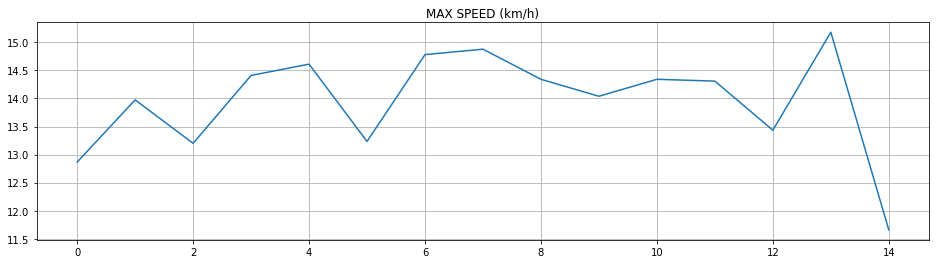

In [42]:
graph = laps['max speed (km/h)']
graph.astype(float).plot(figsize=(16,4))
plt.title('MAX SPEED (km/h)')
plt.grid()

# Power (watts)

In [13]:
laps['power (w)'].describe()

count     15.000000
mean     567.997533
std      141.292463
min      295.026000
25%      483.066000
50%      633.939000
75%      673.067000
max      709.153000
Name: power (w), dtype: float64

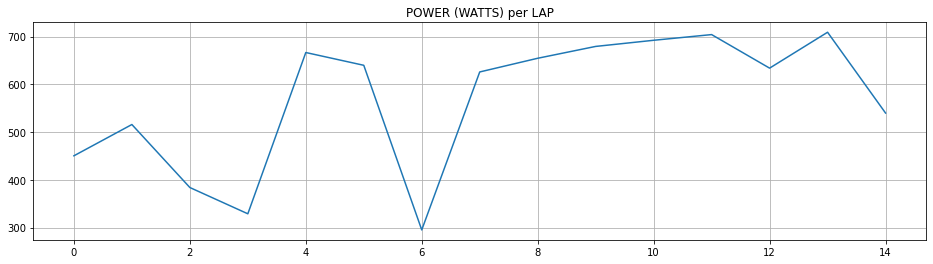

In [46]:
graph = laps['power (w)']
graph.astype(float).plot(figsize=(16,4))
plt.title('POWER (WATTS) per LAP')
plt.grid()

# Power (w) vs Speed (km/h)

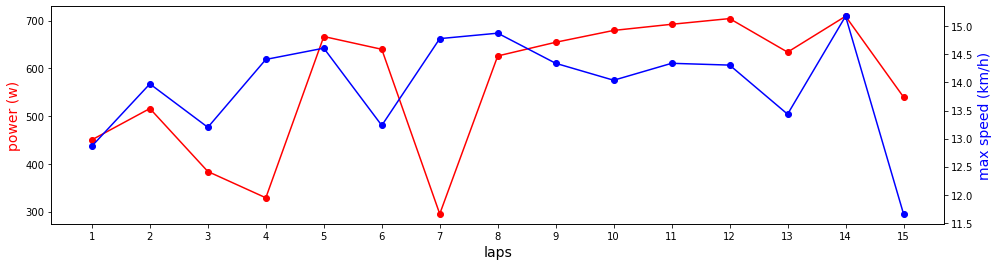

In [15]:
overlay_graph(csv.Laps, laps['power (w)'], laps['max speed (km/h)'])

# Energy (kj)

In [16]:
laps['energy (kj)'].describe()

count     15.000000
mean      90.932289
std       35.694453
min       16.736001
25%       77.404029
50%       83.680054
75%       98.324036
max      167.360218
Name: energy (kj), dtype: float64

# Energy (kj) vs Power (watts)

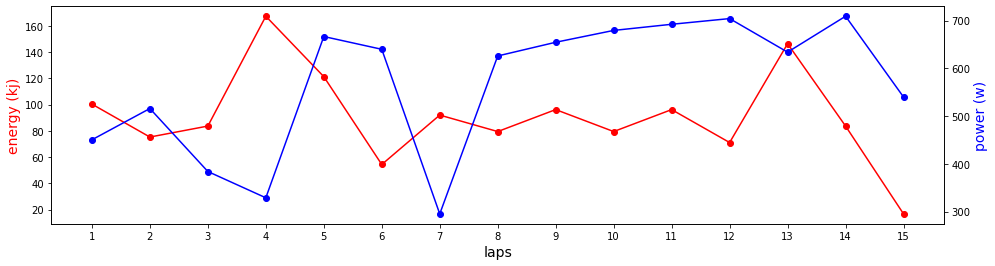

In [17]:
overlay_graph(csv.Laps, laps['energy (kj)'], laps['power (w)'])

# Energy (kj) vs Speed (km/h)

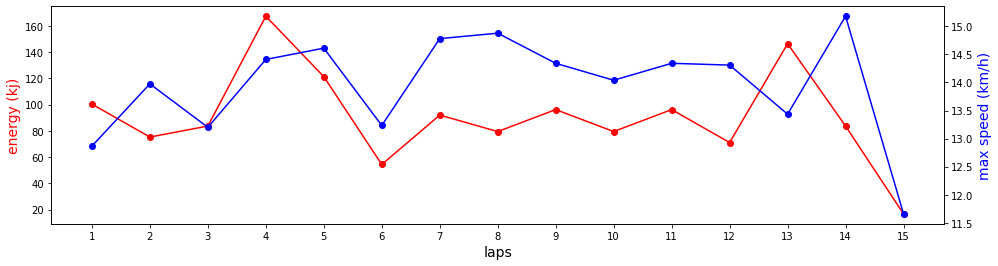

In [18]:
overlay_graph(csv.Laps, laps['energy (kj)'], laps['max speed (km/h)'])

# Heart Rate (bpm)

In [19]:
tracks['hr'].describe()

count    2667.000000
mean      131.999250
std        20.528117
min        93.000000
25%       113.000000
50%       134.000000
75%       148.000000
max       171.000000
Name: hr, dtype: float64

# Avg Heart Rate vs Power

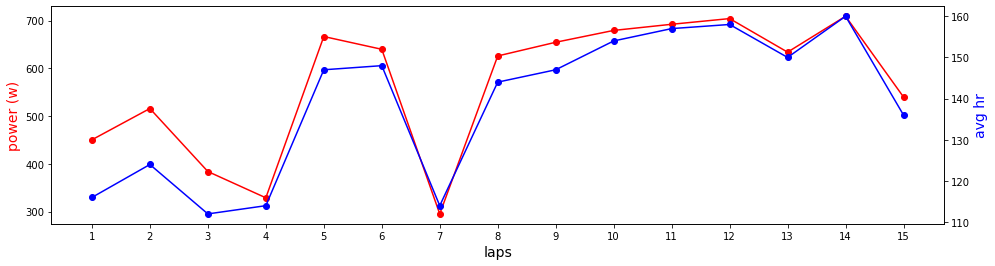

In [20]:
overlay_graph(csv.Laps, laps['power (w)'], laps["avg hr"])

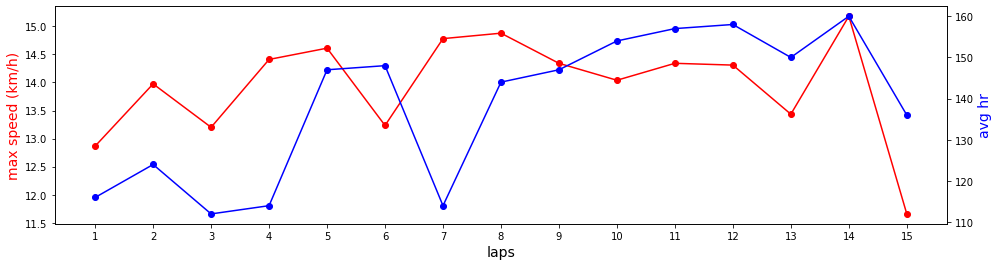

In [47]:
overlay_graph(csv.Laps, laps['max speed (km/h)'], laps["avg hr"])

# Avg Stroke Rate

In [21]:
csv['Avg Stroke Rate'].describe()

count    15.000000
mean     19.400000
std       2.585675
min      16.000000
25%      17.000000
50%      20.000000
75%      20.500000
max      25.000000
Name: Avg Stroke Rate, dtype: float64

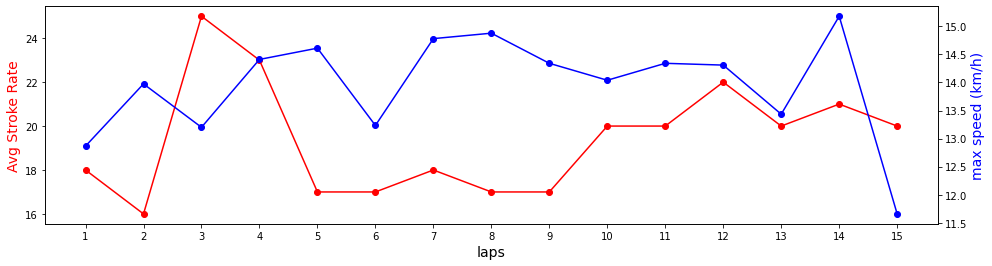

In [22]:
overlay_graph(csv.Laps, csv['Avg Stroke Rate'], laps['max speed (km/h)'])

# Max Stroke Rate

In [23]:
csv['Max Stroke Rate'].describe()

count    15.000000
mean     26.866667
std       9.257172
min      18.000000
25%      22.000000
50%      24.000000
75%      27.500000
max      51.000000
Name: Max Stroke Rate, dtype: float64

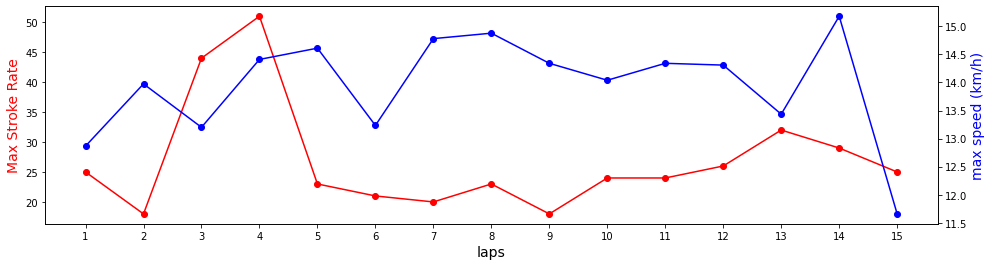

In [24]:
overlay_graph(csv.Laps, csv['Max Stroke Rate'], laps['max speed (km/h)'])

# Avg Distance per Stroke (meters)

In [25]:
csv['Avg Distance per Stroke'].describe()

count    15.000000
mean      8.498000
std       0.902063
min       6.790000
25%       7.910000
50%       8.260000
75%       9.325000
max       9.770000
Name: Avg Distance per Stroke, dtype: float64

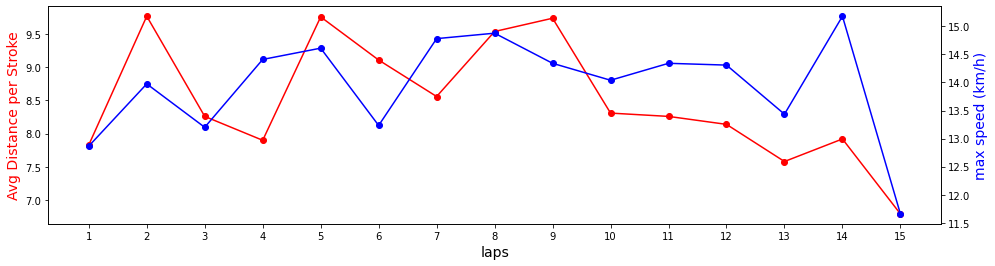

In [26]:
overlay_graph(csv.Laps, csv['Avg Distance per Stroke'], laps['max speed (km/h)'])